In [1]:
import warnings
warnings.filterwarnings(action='ignore')
%config Completer.use_jedi = False
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['axes.unicode_minus'] = False
plt.rcParams['font.family'] = 'NanumGothicCoding'
plt.rcParams['font.size'] = 10
import seaborn as sns

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import silhouette_score

***
밀도 기반 클러스터링(Density-Based Spatial Clustering of Applications with Noise)
***
밀도 기반 클러스터링은 데이터의 공간을 다루는 알고리즘으로 전체 공간에서 데이터가 가장 밀집된 영역을 찾는다.  
그 밀집된 영역이 하나의 클러스터가 되며, 밀집 정도가 낮은 영역을 클러스터 외부 영역으로 구분한다.  
이때 밀집 정도를 파악하기 위해 데이터 포인트간 거리를 측정하게 되는데, 거리를 어떤 방법으로 측정하느냐에 따라 클러스터링 형태가 달라진다.

거리 측정 방법은 밀도 기반 클러스터링 객체를 생성할 때 조절 가능하며, 기본값은 유클리디안 거리를 사용한다.  
클러스터의 갯수를 사전에 정하지 않아도 된다.  

밀도 기반 클러스터링의 핵심 아이디어는 일정 반경 내에 최소한의 데이터 포인트 갯수 이상이 존재한다는 것으로 반경의 최소한의 데이터 포인트 갯수가 밀도 기반 클러스터링의 필수 요소이다.

***
밀도 기반 클러스터링 알고리즘을 활용해서 주어진 데이터를 클러스터링 해본다.
***
데이터 불러오기

In [2]:
# 데이터 불러오기
# make_moons() 메소드로 사이킷런이 제공하는 한지점에서 방향에 상관없이 물질의 중요한 특성이 동일한 성질을 가지는 등방성 가우시안 정규분포를 따르는 가상 데이터를 불러온다.
# n_sample 속성의 기본값은 100이고, 랜덤으로 불러올 데이터의 갯수를 지정한다.
# random_state 속성값을 지정하면 매번 같은 배열의 데이터를 불러온다.
# noise 속성으로 데이터가 흩어지는 정도를 지정한다.
x_train, y_train = datasets.make_moons(n_samples=300, random_state=10, noise=0.05) 
print(x_train.shape, y_train.shape)
#for i in range(len(x_train)):
#     print(x_train[i], y_train[i])

(300, 2) (300,)


***
클러스터링 되지 않은 데이터 시각화
***

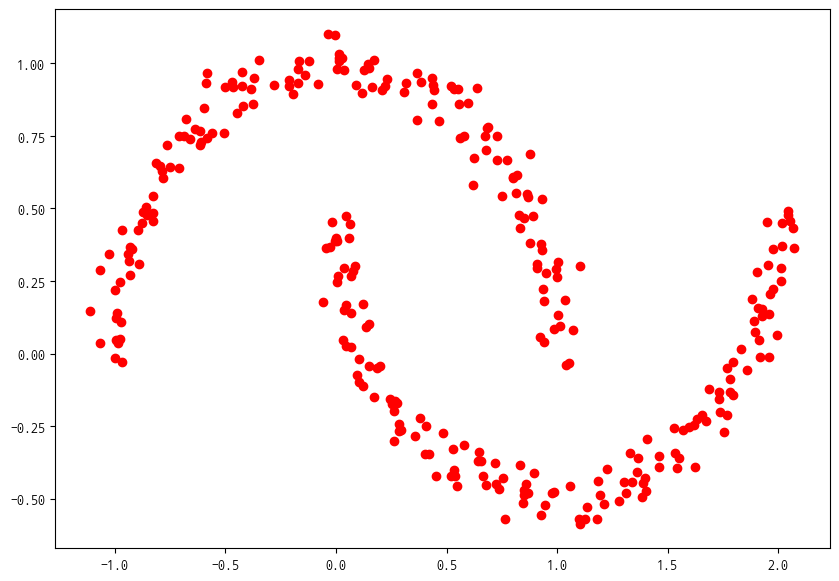

In [3]:
# 클러스터링되지 않은 데이터 시각화
plt.figure(figsize=[10, 7])
plt.scatter(x=x_train[: , 0], y=x_train[:, 1], c="red")
plt.show()

***
k-평균 클러스터링 모델을 생성 후 학습시킨다.
***

In [4]:
from sklearn.cluster import KMeans
cluster = KMeans(n_clusters=2, init="random", max_iter=100, random_state=0)
cluster.fit(x_train)
print(cluster.labels_)

[0 1 1 0 1 1 1 1 0 0 0 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 1 1 1 0 1 0 0 0
 1 0 1 1 1 0 1 1 0 1 1 1 0 0 1 0 1 0 0 0 1 1 1 0 1 0 0 1 1 1 1 0 0 0 1 1 0
 0 0 1 1 0 1 1 1 0 0 1 1 1 0 0 1 0 1 0 0 0 0 1 1 1 1 0 0 0 0 1 0 0 1 0 1 0
 1 0 1 0 1 1 1 0 1 1 1 1 0 0 0 0 0 0 1 1 1 1 0 0 0 1 0 1 1 0 1 1 1 0 0 0 0
 1 1 1 0 0 0 0 0 0 1 1 0 1 1 0 0 1 0 1 1 1 0 0 1 1 1 1 0 0 0 1 1 1 1 1 0 0
 1 1 1 1 0 1 0 0 0 1 1 1 1 0 1 1 1 1 1 0 0 1 0 0 1 1 0 0 0 0 1 1 1 0 0 1 1
 0 1 1 1 0 1 1 0 0 0 0 1 0 1 0 1 1 1 0 0 0 1 0 1 1 1 0 1 0 0 1 1 0 1 0 0 1
 1 1 1 0 0 0 1 0 0 1 0 1 0 0 1 1 1 1 0 0 1 0 1 1 0 0 1 1 1 0 0 1 0 1 0 0 1
 1 0 1 0]


In [5]:
# 클러스터링된 데이터 시각화를 위해 데이터 프레임을 만든다.
x_train_df = pd.DataFrame(x_train, columns=['x', 'y'])
x_train_df["label"] = y_train
x_train_df["cluster"] = cluster.labels_ # 데이터프레임에 클러스터링된 레이블을 넣어준다.
x_train_df

,x,y,label,cluster
0,0.831858,0.430931,0,0
1,0.115706,0.898050,0,1
2,-0.611459,0.729373,0,1
3,1.656398,-0.211761,1,0
4,0.262239,-0.299898,1,1
...,...,...,...,...
295,0.062868,0.447505,1,1
296,-0.859324,0.503234,0,1
297,0.935721,0.221339,0,0
298,-0.828297,0.455657,0,1


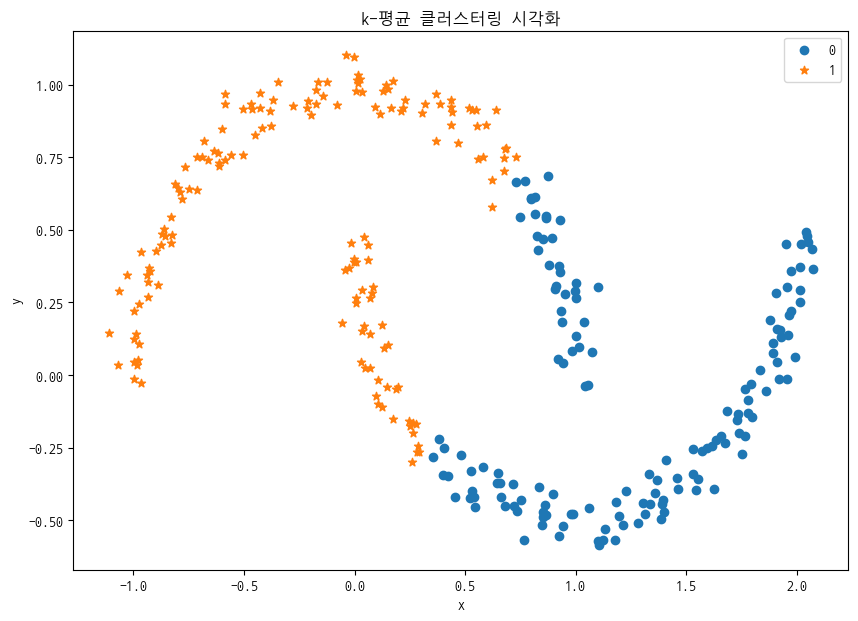

In [6]:
# 위 셀의 시각화 코드를 반복문을 사용해서 만든다.
plt.figure(figsize=[10, 7])
markers = ["o", "*", "s", "x", "^", "v"]

for i in set(x_train_df.cluster):
     df_index = x_train_df[x_train_df.cluster == i] # 클러스터링 결과별로 데이터를 분할한다.
     X = df_index.x # 클러스터링 결과에서 첫번째 성분 벡터를 추출한다.
     Y = df_index.y # 클러스터링 결과에서 두번째 성분 벡터를 추출한다.
     plt.scatter(x=X, y=Y, marker = markers[i], label=i ) # 산포도를 그린다.

plt.title("k-평균 클러스터링 시각화")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()

***
병합 계층 클러스터링 모델을 생성 후 학습시킨다.
***

In [7]:
from sklearn.cluster import AgglomerativeClustering 
cluster = AgglomerativeClustering(n_clusters=2, linkage="complete")
cluster.fit(x_train)

# 클러스터링 결과(레이블)를 확인한다.
# labels_ 속성으로 클러스터링 결과를 얻어올 수 있다.
print(cluster.labels_)

[0 0 0 1 0 0 0 0 1 1 1 0 0 1 1 0 1 1 0 1 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 1 1
 0 1 0 0 0 1 0 0 0 0 0 0 0 1 0 1 0 1 0 1 0 0 0 0 0 1 0 0 0 0 0 0 1 1 0 0 1
 0 1 0 0 1 0 0 0 0 1 0 0 0 1 0 0 1 0 1 1 1 0 0 0 0 0 1 1 1 1 0 1 0 0 1 0 0
 0 1 0 1 0 0 0 0 0 0 0 0 0 1 1 1 1 1 0 0 0 0 1 1 1 0 0 0 0 1 0 0 0 1 0 0 0
 0 0 0 0 1 1 1 1 1 0 0 1 0 0 1 0 0 1 0 0 0 1 1 0 0 0 0 1 1 1 0 0 0 0 0 1 0
 0 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 1 0 0 0 0 0 0 0 1 0 0
 1 0 0 0 1 0 0 1 1 1 0 0 0 0 1 0 0 0 1 1 1 0 0 0 0 0 1 0 1 0 0 0 1 0 1 0 0
 0 0 0 1 1 1 0 1 1 0 1 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 1 0 0 1 0 0 1 0
 0 0 0 1]


In [8]:
# 클러스터링된 데이터 시각화를 위해 데이터 프레임을 만든다.
x_train_df = pd.DataFrame(x_train, columns=['x', 'y'])
x_train_df["label"] = y_train
x_train_df["cluster"] = cluster.labels_ # 데이터프레임에 클러스터링된 레이블을 넣어준다.
x_train_df

,x,y,label,cluster
0,0.831858,0.430931,0,0
1,0.115706,0.898050,0,0
2,-0.611459,0.729373,0,0
3,1.656398,-0.211761,1,1
4,0.262239,-0.299898,1,0
...,...,...,...,...
295,0.062868,0.447505,1,0
296,-0.859324,0.503234,0,0
297,0.935721,0.221339,0,0
298,-0.828297,0.455657,0,0


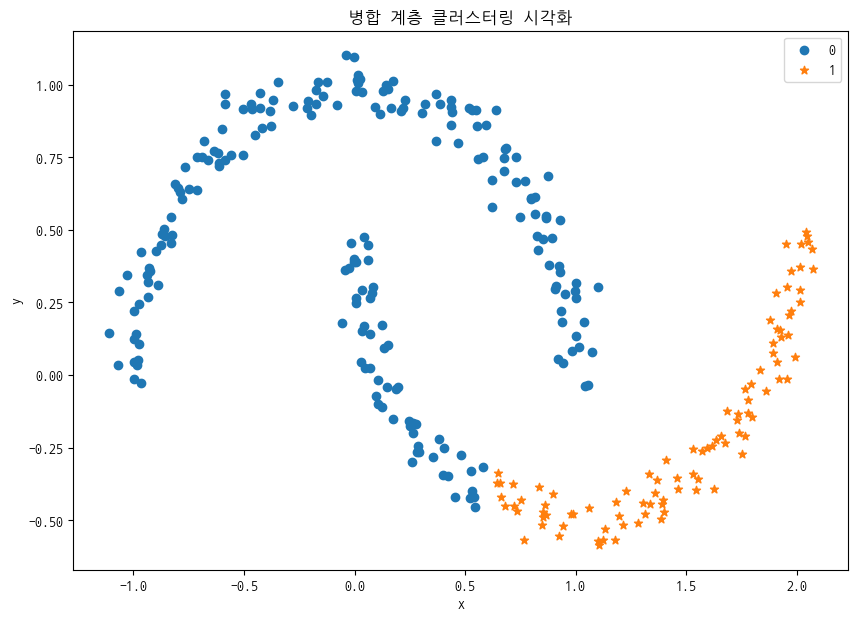

In [9]:
# 위 셀의 시각화 코드를 반복문을 사용해서 만든다.
plt.figure(figsize=[10, 7])
markers = ["o", "*", "s", "x", "^", "v"]

for i in set(x_train_df.cluster):
     df_index = x_train_df[x_train_df.cluster == i] # 클러스터링 결과별로 데이터를 분할한다.
     X = df_index.x # 클러스터링 결과에서 첫번째 성분 벡터를 추출한다.
     Y = df_index.y # 클러스터링 결과에서 두번째 성분 벡터를 추출한다.
     plt.scatter(x=X, y=Y, marker = markers[i], label=i ) # 산포도를 그린다.

plt.title("병합 계층 클러스터링 시각화")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()

***
가우시안 혼합 모델 클러스터링 생성 후 데이터 학습
***

In [10]:
# 가우시안 혼합 클러스터링 모델 알고리즘 사용
from sklearn.mixture import GaussianMixture

# n_components 속성에 클러스터링 갯수를 지정해서 가우시안 혼합 클러스터링 모델을 만든다. 기본값 -> 1
cluster = GaussianMixture(n_components=2, random_state=0)

#학습데이터로 가우시안 혼합 클러스터링 모델을 학습시킨다.
cluster.fit(x_train)

GaussianMixture(n_components=2, random_state=0)

In [11]:
# 클러스터링 결과(레이블)를 확인한다.
#fit_predict() 메소드에 피쳐 데이터를 넘겨서 클러스터링 결과를 확인할 수 있다. 
print(cluster.fit_predict(x_train))

[0 0 0 1 1 1 0 0 1 1 1 0 1 1 1 0 1 1 1 1 0 1 0 0 0 0 0 1 1 0 0 0 0 1 1 1 1
 0 1 0 0 0 1 0 1 1 0 0 0 1 1 0 1 0 1 1 1 0 0 0 0 0 1 0 1 0 0 0 1 1 1 0 0 1
 1 1 1 0 1 0 0 0 1 1 0 0 0 1 1 0 1 0 1 1 1 0 0 0 0 0 1 1 1 1 0 1 1 0 1 1 1
 0 1 0 1 0 0 0 0 0 1 0 0 1 1 1 1 1 1 0 0 0 0 1 1 1 0 1 0 0 1 0 0 0 1 0 1 1
 0 0 0 0 1 1 1 1 1 1 0 1 0 0 1 1 1 1 1 0 0 1 1 0 0 0 0 1 1 1 0 0 0 0 0 1 0
 0 0 0 0 1 0 1 0 1 0 0 0 0 1 0 0 0 0 1 0 1 0 1 1 0 0 1 0 1 0 0 0 0 1 1 0 0
 1 0 0 0 1 0 1 1 1 1 1 0 1 0 1 0 0 0 1 1 1 0 0 1 0 0 1 0 1 1 0 0 1 0 1 1 0
 0 0 0 1 1 1 0 1 1 0 1 0 1 0 0 0 0 0 1 1 0 1 1 1 1 0 0 0 0 1 1 0 1 0 1 1 0
 0 1 0 1]


In [12]:
# 클러스터링된 데이터 시각화를 위해 데이터 프레임을 만든다.
x_train_df = pd.DataFrame(x_train, columns=['x', 'y'])
x_train_df["label"] = y_train
x_train_df["cluster"] = cluster.fit_predict(x_train) # 데이터프레임에 클러스터링된 레이블을 넣어준다.
x_train_df

,x,y,label,cluster
0,0.831858,0.430931,0,0
1,0.115706,0.898050,0,0
2,-0.611459,0.729373,0,0
3,1.656398,-0.211761,1,1
4,0.262239,-0.299898,1,1
...,...,...,...,...
295,0.062868,0.447505,1,0
296,-0.859324,0.503234,0,0
297,0.935721,0.221339,0,1
298,-0.828297,0.455657,0,0


In [13]:
# 레이블과 클러스터링된 레이블의 종류 확인
print(set(x_train_df.label))
print(set(x_train_df.cluster))

{0, 1}
{0, 1}


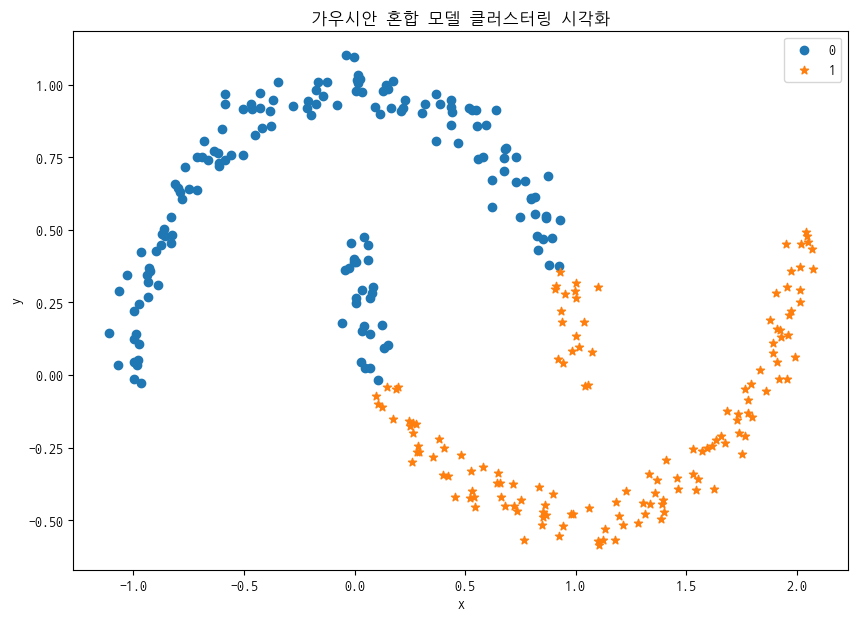

In [14]:
# 위 셀의 시각화 코드를 반복문을 사용해서 만든다.
plt.figure(figsize=[10, 7])
markers = ["o", "*", "s", "x", "^", "v"]

for i in set(x_train_df.cluster):
     df_index = x_train_df[x_train_df.cluster == i] # 클러스터링 결과별로 데이터를 분할한다.
     X = df_index.x # 클러스터링 결과에서 첫번째 성분 벡터를 추출한다.
     Y = df_index.y # 클러스터링 결과에서 두번째 성분 벡터를 추출한다.
     plt.scatter(x=X, y=Y, marker = markers[i], label=i ) # 산포도를 그린다.

plt.title("가우시안 혼합 모델 클러스터링 시각화")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()

***
밀도 기반 클러스터링 모델 생성 후 데이터 학습
***

In [15]:
from sklearn.cluster import DBSCAN # 밀도 기반 클러스터링 알고리즘 사용
# min_samples 속성으로 일정 반경내에 최소한의 데이터 포인트 갯수(기본값 -> 5)와
# eps 속성으로 데이터 포인트의 갯수를 측정할 반경(기본값 -> 0.5)을 지정해서 밀도 기반 클러스터링 모델 객체를 만든다.
cluster = DBSCAN(min_samples=5, eps=0.2)

#학습데이터로 병합 계층 클러스터링 모델을 학습시킨다.
cluster.fit(x_train)

DBSCAN(eps=0.2)

In [16]:
# 클러스터링 결과(레이블)를 확인한다.
# labels_ 속성으로 클러스터링 결과를 얻어올 수 있다.
print(cluster.labels_)
#fit_predict() 메소드에 피쳐 데이터를 넘겨서 클러스터링 결과를 확인할 수 있다. 
print(cluster.fit_predict(x_train))

[0 0 0 1 1 1 0 0 1 1 1 0 1 1 1 0 1 1 1 1 0 1 0 0 1 0 0 1 1 0 0 1 0 1 1 1 1
 0 1 0 0 1 1 0 1 1 0 0 0 0 1 0 1 0 1 1 1 0 1 0 0 0 1 0 1 0 0 0 0 1 1 0 0 1
 1 1 1 1 1 0 1 0 0 1 0 1 0 1 1 0 1 0 1 1 1 0 0 1 0 1 1 1 1 1 0 1 0 0 1 1 0
 0 1 0 1 1 0 0 0 0 1 1 0 0 1 1 1 1 1 0 0 1 0 1 1 1 1 0 0 1 1 0 0 0 1 0 0 0
 0 0 0 0 1 1 1 1 1 1 0 1 0 0 1 1 1 1 1 1 0 1 1 0 0 0 0 1 1 1 1 0 0 0 0 1 0
 1 0 0 1 1 0 1 0 1 0 0 0 1 1 1 0 1 0 1 0 1 0 0 1 0 0 1 0 0 0 0 0 1 1 1 1 0
 1 0 0 0 1 0 1 1 1 1 0 0 0 1 1 0 0 0 1 1 1 0 0 1 0 0 1 0 1 0 0 0 1 0 1 1 0
 0 0 0 1 1 1 0 1 1 0 1 0 0 0 0 0 1 0 1 0 0 1 1 1 1 0 0 0 0 1 0 0 1 0 0 1 1
 0 0 0 1]
[0 0 0 1 1 1 0 0 1 1 1 0 1 1 1 0 1 1 1 1 0 1 0 0 1 0 0 1 1 0 0 1 0 1 1 1 1
 0 1 0 0 1 1 0 1 1 0 0 0 0 1 0 1 0 1 1 1 0 1 0 0 0 1 0 1 0 0 0 0 1 1 0 0 1
 1 1 1 1 1 0 1 0 0 1 0 1 0 1 1 0 1 0 1 1 1 0 0 1 0 1 1 1 1 1 0 1 0 0 1 1 0
 0 1 0 1 1 0 0 0 0 1 1 0 0 1 1 1 1 1 0 0 1 0 1 1 1 1 0 0 1 1 0 0 0 1 0 0 0
 0 0 0 0 1 1 1 1 1 1 0 1 0 0 1 1 1 1 1 1 0 1 1 0 0 0 0 1 1 1 1 0 0 0 0 1 0
 1 0 0 1 1 0 1 

***
밀도 기반 클러스터링 알고리즘으로 클러스터링된 이미지 시각화
***

In [17]:
# 클러스터링된 데이터 시각화를 위해 데이터 프레임을 만든다.
x_train_df = pd.DataFrame(x_train, columns=['x', 'y'])
x_train_df["label"] = y_train
x_train_df["cluster"] = cluster.labels_ # 데이터프레임에 클러스터링된 레이블을 넣어준다.
x_train_df

,x,y,label,cluster
0,0.831858,0.430931,0,0
1,0.115706,0.898050,0,0
2,-0.611459,0.729373,0,0
3,1.656398,-0.211761,1,1
4,0.262239,-0.299898,1,1
...,...,...,...,...
295,0.062868,0.447505,1,1
296,-0.859324,0.503234,0,0
297,0.935721,0.221339,0,0
298,-0.828297,0.455657,0,0


In [18]:
# 레이블과 클러스터링된 레이블의 종류 확인
print(set(x_train_df.label))
print(set(x_train_df.cluster))

{0, 1}
{0, 1}


***
실제 데이터의 레이블 데이터 시각화
***

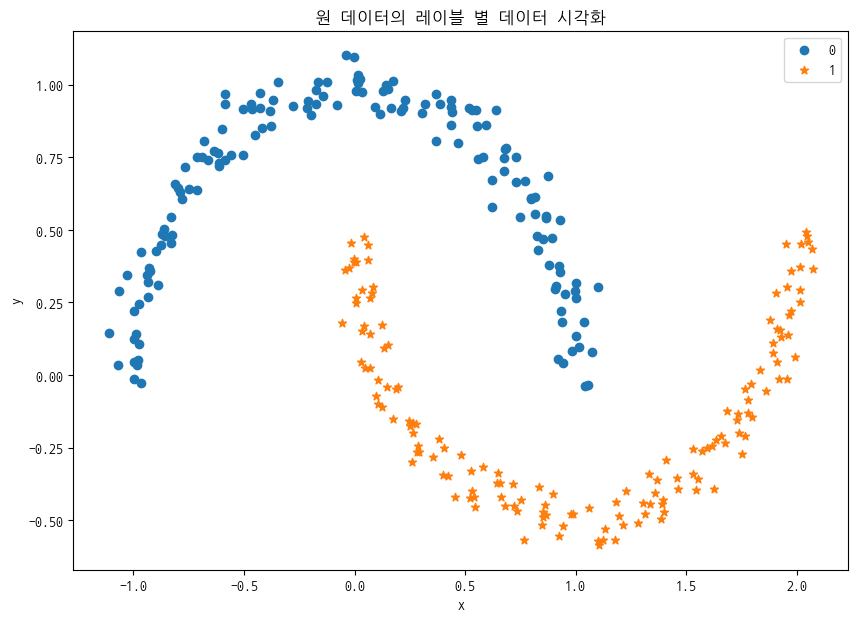

In [19]:
# 위 셀의 시각화 코드를 반복문을 사용해서 만든다.
plt.figure(figsize=[10, 7])
markers = ["o", "*", "s", "x", "^", "v"]

for i in set(x_train_df.label):
     df_index = x_train_df[x_train_df.label == i] # 원 데이터의 레이블 데이터를 분할한다.
     X = df_index.x # 학습 데이터의 첫번째 성분 벡터를 추출한다.
     Y = df_index.y # 학습 데이터의 두번째 성분 벡터를 추출한다.
     plt.scatter(x=X, y=Y, marker = markers[i], label= i ) # 산포도를 그린다.

plt.title("원 데이터의 레이블 별 데이터 시각화")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()

***
밀도 기반 클러스터링 된 결과 데이터 시각화
***

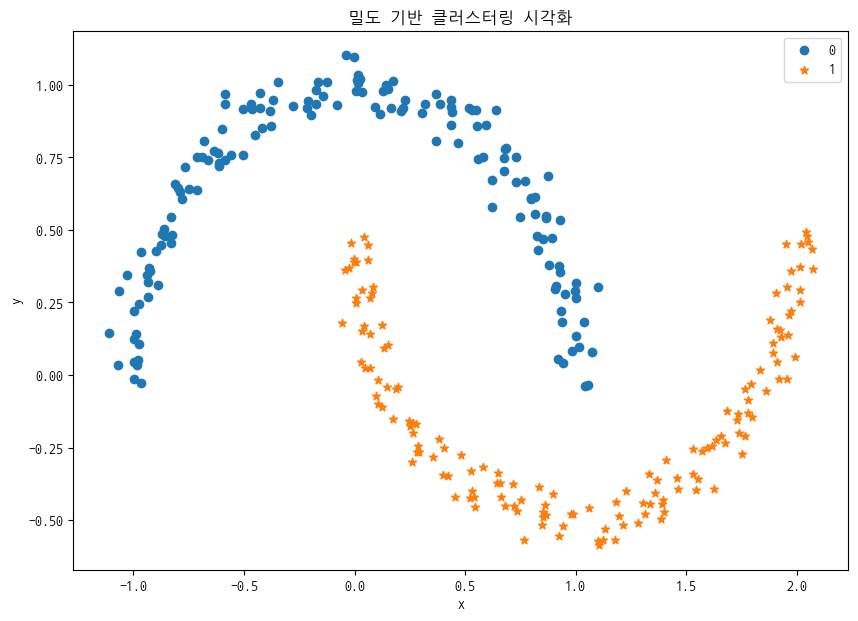

In [20]:
# 위 셀의 시각화 코드를 반복문을 사용해서 만든다.
plt.figure(figsize=[10, 7])
markers = ["o", "*", "s", "x", "^", "v"]

for i in set(x_train_df.cluster):
     df_index = x_train_df[x_train_df.cluster == i] # 클러스터링 결과별로 데이터를 분할한다.
     X = df_index.x # 클러스터링 결과에서 첫번째 성분 벡터를 추출한다.
     Y = df_index.y # 클러스터링 결과에서 두번째 성분 벡터를 추출한다.
     plt.scatter(x=X, y=Y, marker = markers[i], label=i ) # 산포도를 그린다.

plt.title("밀도 기반 클러스터링 시각화")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()

***
학습된 모델을 평가한다.
***

In [21]:
# silhouette_score() 메소드에 피쳐 데이터와 군집화 결과로 얻은 클러스터를 넘겨 실루엣 스코어를 평가한다.
sil_score = silhouette_score(x_train, cluster.labels_)
print(sil_score)

0.3260472493595187
